In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier

from concurrent.futures import ThreadPoolExecutor

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from yellowbrick.classifier import ConfusionMatrix

import warnings

In [2]:
def convert_to_integer(value): # Birden fazla dbm_antsignal değerlerinin olduğu durumda dönüşüm işlemi için 
    if pd.isna(value) or value == '':
        return None 
    elif isinstance(value, int) or isinstance(value, float):
        return value
    else:
        signal_strengths = [int(v) for v in value.split('-') if v]
        if signal_strengths:
            average_strength = round(sum(signal_strengths) / len(signal_strengths))
            return -average_strength
        else:
            return None

In [3]:
def convert_hex_to_float(value):
    # Değerin string olup olmadığını kontrol et
    if isinstance(value, str):
        # String ise, hexadecimal'den integer'a, sonra float'a çevir
        return float(int(value, 16))
    else:
        # String değilse, değeri olduğu gibi bırak (NaN dahil)
        return value

In [4]:
warnings.filterwarnings('ignore')

In [5]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

selected_features = ['frame.len', 'radiotap.length', 'radiotap.dbm_antsignal', 'radiotap.channel.freq', 'wlan.duration', 'radiotap.present.tsft', 'radiotap.channel.type.cck', 'radiotap.channel.type.ofdm', 'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 'wlan.fc.moredata', 'wlan.fc.protected']

### Read AWID2 Trn

In [6]:
awid2trn_data = pd.read_csv("./AWID-CLS-R-Trn/AWID-CLS-R-Trn/1", header=None, names=features, low_memory=False)

awid2trn_data = awid2trn_data.loc[:, selected_features + ['class']]
pd.set_option('display.max_columns', None)

awid2trn_data.head(10)

,frame.len,radiotap.length,radiotap.dbm_antsignal,radiotap.channel.freq,wlan.duration,radiotap.present.tsft,radiotap.channel.type.cck,radiotap.channel.type.ofdm,wlan.fc.type,wlan.fc.subtype,wlan.fc.ds,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,class
0,261,26,-47,2437,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
1,185,26,-47,2437,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
2,185,26,-64,2437,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
3,159,26,-32,2437,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
4,54,26,-21,2437,44,1,0,1,2,4,0x01,0,0,0,0,0,normal
5,40,26,-24,2437,0,1,0,1,1,13,0x00,0,0,0,0,0,normal
6,261,26,-47,2437,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
7,40,26,-24,2437,0,1,0,1,1,13,0x00,0,0,0,0,0,normal
8,185,26,-52,2437,0,1,1,0,0,8,0x00,0,0,0,0,0,normal
9,185,26,-58,2437,0,1,1,0,0,8,0x00,0,0,0,0,0,normal


### Read AWID2 Tst

In [7]:
awid2tst_data = pd.read_csv("./AWID-CLS-R-Tst/AWID-CLS-R-Tst/awid2test", header=None, names=features, low_memory=False)

awid2tst_data = awid2tst_data.loc[:, selected_features + ['class']]
pd.set_option('display.max_columns', None)

awid2tst_data.head(10)

,frame.len,radiotap.length,radiotap.dbm_antsignal,radiotap.channel.freq,wlan.duration,radiotap.present.tsft,radiotap.channel.type.cck,radiotap.channel.type.ofdm,wlan.fc.type,wlan.fc.subtype,wlan.fc.ds,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,class
0,1552,26,-25,2437,44,1,0,1,2,8,0x02,0,0,0,0,1,normal
1,1552,26,-25,2437,44,1,0,1,2,8,0x02,0,1,0,0,1,normal
2,40,26,-26,2437,0,1,0,1,1,13,0x00,0,0,0,0,0,normal
3,40,26,-26,2437,0,1,0,1,1,13,0x00,0,0,0,0,0,normal
4,1552,26,-26,2437,44,1,0,1,2,8,0x02,0,0,0,0,1,normal
5,1552,26,-25,2437,44,1,0,1,2,8,0x02,0,0,0,0,1,normal
6,1552,26,-25,2437,44,1,0,1,2,8,0x02,0,0,0,0,1,normal
7,1552,26,-26,2437,44,1,0,1,2,8,0x02,0,0,0,0,1,normal
8,40,26,-24,2437,0,1,0,1,1,13,0x00,0,0,0,0,0,normal
9,1552,26,-26,2437,44,1,0,1,2,8,0x02,0,0,0,0,1,normal


### Dropping NaN values

In [8]:
awid2trn_data = awid2trn_data.replace(r'^\s*$', pd.NA, regex=True)
awid2trn_data = awid2trn_data.replace('?', pd.NA)
awid2trn_data = awid2trn_data.dropna()

In [9]:
awid2tst_data = awid2tst_data.replace(r'^\s*$', pd.NA, regex=True)
awid2tst_data = awid2tst_data.replace('?', pd.NA)
awid2tst_data = awid2tst_data.dropna()

### Some data with the 'Normal' label was randomly removed due to memory limitations

In [10]:
number_to_delete = 700_000
normal_indices = awid2trn_data[awid2trn_data['class'] == 'normal'].index
indices_to_delete = pd.Series(normal_indices).sample(n=number_to_delete, random_state=42)
awid2trn_data = awid2trn_data.drop(indices_to_delete)

### Injection rows removed

In [11]:
filter_train = awid2trn_data['class'] != 'injection'
filter_test = awid2tst_data['class'] != 'injection'
awid2trn_data = awid2trn_data[filter_train]
awid2tst_data = awid2tst_data[filter_test]

In [12]:
X_awid2trn = awid2trn_data.loc[:, selected_features]
y_awid2trn = awid2trn_data[['class']]

In [13]:
X_awid2tst = awid2tst_data.loc[:, selected_features]
y_awid2tst = awid2tst_data[['class']]

In [14]:
X_awid2trn

,frame.len,radiotap.length,radiotap.dbm_antsignal,radiotap.channel.freq,wlan.duration,radiotap.present.tsft,radiotap.channel.type.cck,radiotap.channel.type.ofdm,wlan.fc.type,wlan.fc.subtype,wlan.fc.ds,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected
0,261,26,-47,2437,0,1,1,0,0,8,0x00,0,0,0,0,0
1,185,26,-47,2437,0,1,1,0,0,8,0x00,0,0,0,0,0
3,159,26,-32,2437,0,1,1,0,0,8,0x00,0,0,0,0,0
4,54,26,-21,2437,44,1,0,1,2,4,0x01,0,0,0,0,0
6,261,26,-47,2437,0,1,1,0,0,8,0x00,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795567,261,26,-47,2437,0,1,1,0,0,8,0x00,0,0,0,0,0
1795569,54,26,-15,2437,44,1,0,1,2,4,0x01,0,0,1,0,0
1795570,40,26,-25,2437,0,1,0,1,1,13,0x00,0,0,0,0,0
1795571,148,26,-58,2437,0,1,1,0,0,8,0x00,0,0,0,0,0


### Some columns converted

In [15]:
# radiotap.dbm_antsignal değerleri integera dönüştürüldü
X_awid2trn['radiotap.dbm_antsignal'] = X_awid2trn['radiotap.dbm_antsignal'].apply(convert_to_integer)

In [16]:
# radiotap.dbm_antsignal değerleri integera dönüştürüldü
X_awid2tst['radiotap.dbm_antsignal'] = X_awid2tst['radiotap.dbm_antsignal'].apply(convert_to_integer)

In [17]:
# 'wlan.fc.ds' sütunu float değere dönüştürüldü
X_awid2trn['wlan.fc.ds'] = X_awid2trn['wlan.fc.ds'].apply(convert_hex_to_float)

### Smote

In [18]:
print(f"normal:\n{y_awid2trn[y_awid2trn['class']=='normal'].count()}")
print(f"impersonation:\n{y_awid2trn[y_awid2trn['class']=='impersonation'].count()}")
print(f"flooding:\n{y_awid2trn[y_awid2trn['class']=='flooding'].count()}")
print(f"injection:\n{y_awid2trn[y_awid2trn['class']=='injection'].count()}")

normal:
class    931218
dtype: int64
impersonation:
class    48522
dtype: int64
flooding:
class    48484
dtype: int64
injection:
class    0
dtype: int64


In [19]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_awid2trn, y_awid2trn = smote.fit_resample(X_awid2trn, y_awid2trn)
# X_awid2trn

In [20]:
print(f"normal:\n{y_awid2trn[y_awid2trn['class']=='normal'].count()}")
print(f"impersonation:\n{y_awid2trn[y_awid2trn['class']=='impersonation'].count()}")
print(f"flooding:\n{y_awid2trn[y_awid2trn['class']=='flooding'].count()}")
print(f"injection:\n{y_awid2trn[y_awid2trn['class']=='injection'].count()}")

normal:
class    931218
dtype: int64
impersonation:
class    931218
dtype: int64
flooding:
class    931218
dtype: int64
injection:
class    0
dtype: int64


In [21]:
print(f"normal:\n{y_awid2tst[y_awid2tst['class']=='normal'].count()}")
print(f"impersonation:\n{y_awid2tst[y_awid2tst['class']=='impersonation'].count()}")
print(f"flooding:\n{y_awid2tst[y_awid2tst['class']=='flooding'].count()}")
print(f"injection:\n{y_awid2tst[y_awid2tst['class']=='injection'].count()}")

normal:
class    530458
dtype: int64
impersonation:
class    20079
dtype: int64
flooding:
class    8097
dtype: int64
injection:
class    0
dtype: int64


### Encoding

In [21]:
columns_to_scale = ['frame.len', 'radiotap.length', 'radiotap.dbm_antsignal', 'wlan.duration']
columns_to_one_hot_encode = [col for col in X_awid2trn.columns if col not in columns_to_scale]

# Min-max scaling
scaler = MinMaxScaler()
X_awid2trn[columns_to_scale] = scaler.fit_transform(X_awid2trn[columns_to_scale])

scaler = MinMaxScaler()
X_awid2tst[columns_to_scale] = scaler.fit_transform(X_awid2tst[columns_to_scale])

# One-hot encoding
combined_data = pd.concat([X_awid2trn, X_awid2tst], axis=0) # Combine dataframes
combined_data = pd.get_dummies(combined_data, columns=columns_to_one_hot_encode)
X_awid2trn_encoded = combined_data[:len(X_awid2trn)]
X_awid2tst_encoded = combined_data[len(X_awid2trn):]

X_awid2trn_encoded

frame.len  radiotap.length  radiotap.dbm_antsignal  wlan.duration  \
0         0.144444              0.0                0.369231       0.000000   
1         0.094771              0.0                0.369231       0.000000   
2         0.077778              0.0                0.600000       0.000000   
3         0.009150              0.0                0.769231       0.003034   
4         0.144444              0.0                0.369231       0.000000   
...            ...              ...                     ...            ...   
2793649   0.037908              0.0                0.707692       0.000000   
2793650   0.037908              0.0                0.707692       0.000000   
2793651   0.037908              0.0                0.707692       0.000000   
2793652   0.037908              0.0                0.707692       0.000000   
2793653   0.037908              0.0                0.707692       0.000000   

         radiotap.channel.freq_2412.0  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   
...                               ...   
2793649                         False   
2793650                         False   
2793651                         False   
2793652                         False   
2793653                         False   

         radiotap.channel.freq_2413.332796856144  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
2793649                                    False   
2793650                                    False   
2793651                                    False   
2793652                                    False   
2793653                                    False   

         radiotap.channel.freq_2414.6094565704043  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   
...                                           ...   
2793649                                     False   
2793650                                     False   
2793651                                     False   
2793652                                     False   
2793653                                     False   

         radiotap.channel.freq_2415.951392800791  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
2793649                                    False   
2793650                                    False   
2793651                                    False   
2793652                                    False   
2793653                                    False   

         radiotap.channel.freq_2417.0  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   
...                               ...   
2793649                         False   
2793650                         False   
2793651                         False   
2793652                         False   
2793653                         False   

         radiotap.channel.freq_2419.839485817069  \
0                                          False   
1                                          False   
2                                          

### Functions for results

In [22]:
def calculate_precision_recall_f1(y_test, y_pred):
    """ Hesaplanan metrikleri sözlük yapısında döndürmektedir. """
    metrics = {
        'precision_weighted': precision_score(y_test, y_pred, average='weighted'),
        'precision_micro': precision_score(y_test, y_pred, average='micro'),
        'precision_macro': precision_score(y_test, y_pred, average='macro'),
        'recall_weighted': recall_score(y_test, y_pred, average='weighted'),
        'recall_micro': recall_score(y_test, y_pred, average='micro'),
        'recall_macro': recall_score(y_test, y_pred, average='macro'),
        'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
        'f1_micro': f1_score(y_test, y_pred, average='micro'),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    }
    return metrics

In [23]:
def calculate_auc(classifier, X_test, y_test):
    if hasattr(classifier, 'predict_proba'):
        y_pred_proba = classifier.predict_proba(X_test)
        if y_pred_proba.shape[1] == 2: # Binary classification
            return roc_auc_score(y_test, y_pred_proba[:, 1])
        else:
            return roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), y_pred_proba, multi_class='ovr')
    elif hasattr(classifier, 'decision_function'):
        y_scores = classifier.decision_function(X_test)
        if len(np.unique(y_test)) == 2:  # Binary classification
            return roc_auc_score(y_test, y_scores)
        else:  # Multi-class classification
            return roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), y_scores, multi_class='ovr')
    else:
        return None

In [24]:
def print_metrics(accuracy, metrics, auc):
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {metrics['precision_weighted']:.4f}")
    print(f"Micro Precision: {metrics['precision_micro']:.4f}")
    print(f"Macro Precision: {metrics['precision_macro']:.4f}")
    print(f"Weighted Recall: {metrics['recall_weighted']:.4f}")
    print(f"Micro Recall: {metrics['recall_micro']:.4f}")
    print(f"Macro Recall: {metrics['recall_macro']:.4f}")
    print(f"Weighted F1 Score: {metrics['f1_weighted']:.4f}")
    print(f"Micro F1 Score: {metrics['f1_micro']:.4f}")
    print(f"Macro F1 Score: {metrics['f1_macro']:.4f}")
    if auc is not None:
        print(f"AUC Score: {auc:.4f}")


In [25]:
def display_confusion_matrix(classifier, X_test, y_test):
    cm = ConfusionMatrix(classifier, classes=['Flooding', 'Impersonation', 'Normal'])
    cm.score(X_test, y_test)
    cm.show()

In [26]:
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    metrics = calculate_precision_recall_f1(y_test, y_pred)
    auc = calculate_auc(classifier, X_test, y_test)

    print_metrics(accuracy, metrics, auc)
    display_confusion_matrix(classifier, X_test, y_test)

### Decision Tree

Accuracy: 0.9278
Weighted Precision: 0.9507
Micro Precision: 0.9278
Macro Precision: 0.4296
Weighted Recall: 0.9278
Micro Recall: 0.9278
Macro Recall: 0.5742
Weighted F1 Score: 0.9373
Micro F1 Score: 0.9278
Macro F1 Score: 0.4616
AUC Score: 0.6078


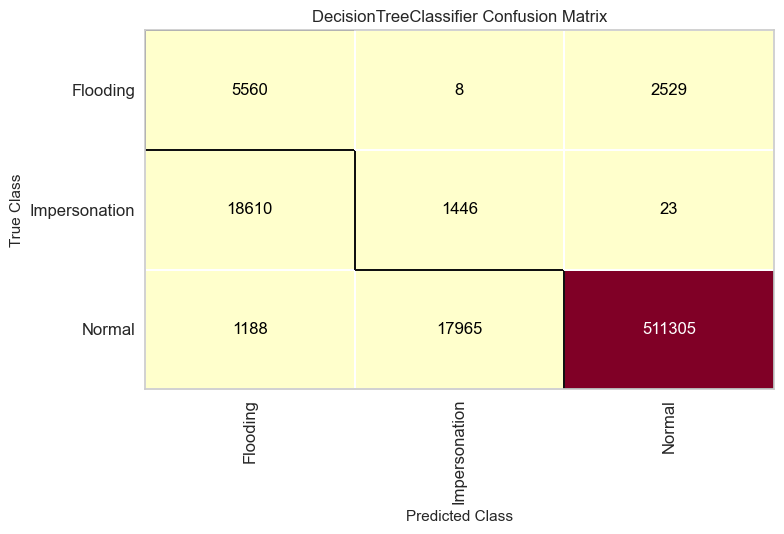

In [27]:
X_train, y_train = X_awid2trn_encoded, y_awid2trn
X_test, y_test = X_awid2tst_encoded, y_awid2tst

y_train = y_train['class'].astype('category').cat.codes
y_test = y_test['class'].astype('category').cat.codes

# Belirli parametrelerle dt modeli
dt_model = DecisionTreeClassifier(
    max_depth=20,
    ccp_alpha=0.001,
    max_leaf_nodes=100,
    min_samples_leaf=2,
    random_state=42
)


dt_model.fit(X_train, y_train)

evaluate_classifier(dt_model, X_test, y_test)

### LightGBM

Accuracy: 0.9305
Weighted Precision: 0.9249
Micro Precision: 0.9305
Macro Precision: 0.5931
Weighted Recall: 0.9305
Micro Recall: 0.9305
Macro Recall: 0.5558
Weighted F1 Score: 0.9276
Micro F1 Score: 0.9305
Macro F1 Score: 0.5728
AUC Score: 0.8880


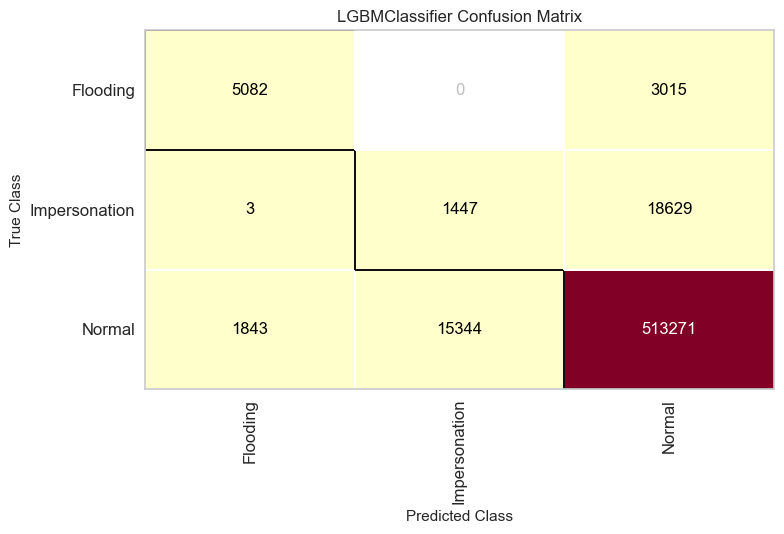

In [28]:
X_train, y_train = X_awid2trn_encoded, y_awid2trn
X_test, y_test = X_awid2tst_encoded, y_awid2tst

y_train = y_train['class'].astype('category').cat.codes
y_test = y_test['class'].astype('category').cat.codes

lgb_params = {
    'objective': 'multiclass',
    'num_class': y_train.nunique(),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 20,
    'learning_rate': 0.01,
    'max_bin': 20,
    'max_depth': 10,
    'min_child_samples': 30,
    'min_data_in_bin': 10,
    'min_split_gain': 0.1,
    'n_estimators': 80,
    'reg_alpha': 0.01,
    'reg_lambda': 0.01,
    'n_jobs': 1,
    'verbose': 0
}

lgb_model = LGBMClassifier(**lgb_params)
lgb_model.fit(X_train, y_train)

evaluate_classifier(lgb_model, X_test, y_test)

### Logistic Regression

Accuracy: 0.6747
Weighted Precision: 0.9531
Micro Precision: 0.6747
Macro Precision: 0.4692
Weighted Recall: 0.6747
Micro Recall: 0.6747
Macro Recall: 0.7603
Weighted F1 Score: 0.7687
Micro F1 Score: 0.6747
Macro F1 Score: 0.4659
AUC Score: 0.9093


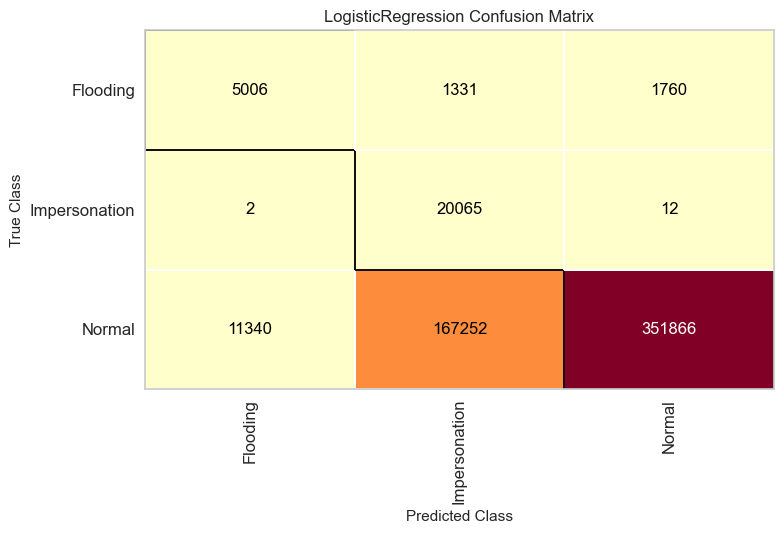

In [29]:
X_train, y_train = X_awid2trn_encoded, y_awid2trn
X_test, y_test = X_awid2tst_encoded, y_awid2tst

y_train = y_train['class'].astype('category').cat.codes
y_test = y_test['class'].astype('category').cat.codes

# Belirli parametreler ile logistic reg modeli
lr_model = LogisticRegression(
    solver='sag',
    max_iter=1000,
    tol=0.01,
    random_state=42,
    multi_class='multinomial'
)

lr_model.fit(X_train, y_train)

evaluate_classifier(lr_model, X_test, y_test)

### SGDClassifier

Accuracy: 0.9496
Weighted Precision: 0.9017
Micro Precision: 0.9496
Macro Precision: 0.3165
Weighted Recall: 0.9496
Micro Recall: 0.9496
Macro Recall: 0.3333
Weighted F1 Score: 0.9250
Micro F1 Score: 0.9496
Macro F1 Score: 0.3247
AUC Score: 0.5000


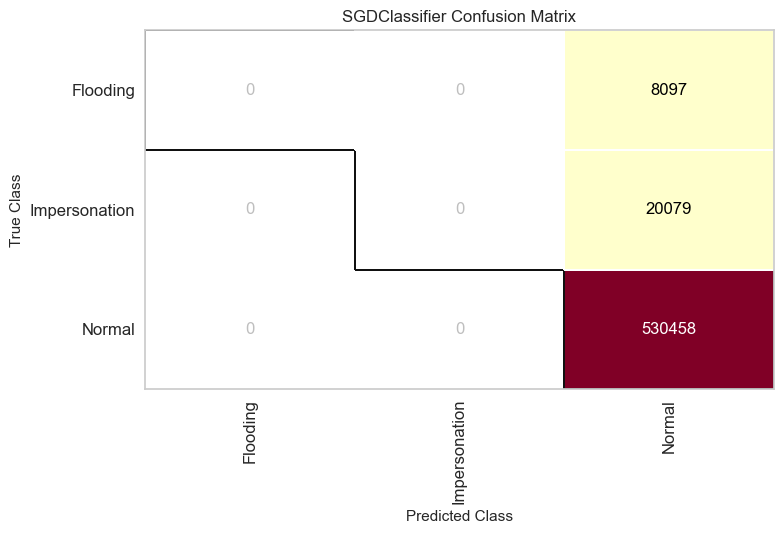

In [30]:
X_train, y_train = X_awid2trn_encoded, y_awid2trn
X_test, y_test = X_awid2tst_encoded, y_awid2tst

y_train = y_train['class'].astype('category').cat.codes
y_test = y_test['class'].astype('category').cat.codes

# Belirli parametreler ile SGD Classifier
sgd_model = SGDClassifier(
    tol=1e-05,
    loss='modified_huber',
    early_stopping=True,
    random_state=42
)

sgd_model.fit(X_train, y_train)

evaluate_classifier(sgd_model, X_test, y_test)

### LinearSVC

Accuracy: 0.3684
Weighted Precision: 0.9515
Micro Precision: 0.3684
Macro Precision: 0.3513
Weighted Recall: 0.3684
Micro Recall: 0.3684
Macro Recall: 0.4500
Weighted F1 Score: 0.4961
Micro F1 Score: 0.3684
Macro F1 Score: 0.2069
AUC Score: 0.7397


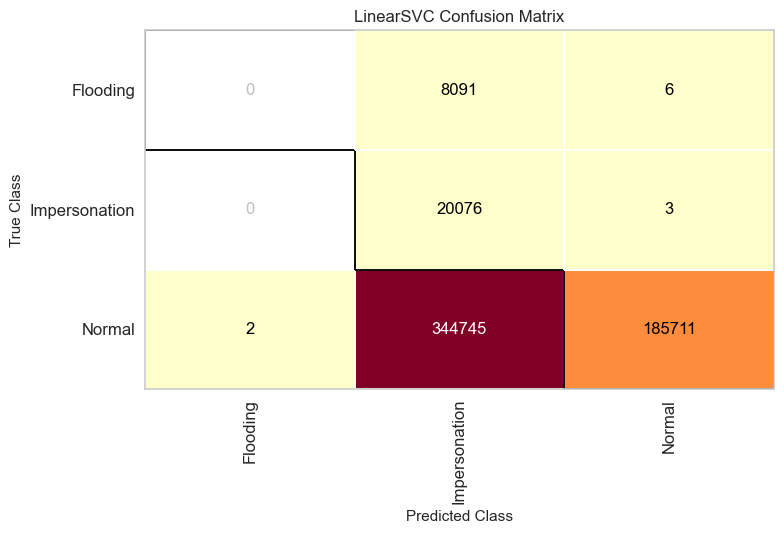

In [31]:
X_train, y_train = X_awid2trn_encoded, y_awid2trn
X_test, y_test = X_awid2tst_encoded, y_awid2tst

y_train = y_train['class'].astype('category').cat.codes
y_test = y_test['class'].astype('category').cat.codes

# Belirli parametreler ile LinearSVC
linear_svc_model = LinearSVC(
    max_iter=20000,
    C=1.5,
    random_state=42
)

linear_svc_model.fit(X_train, y_train)

evaluate_classifier(linear_svc_model, X_test, y_test)

### Random Forest

Accuracy: 0.9319
Weighted Precision: 0.9222
Micro Precision: 0.9319
Macro Precision: 0.6283
Weighted Recall: 0.9319
Micro Recall: 0.9319
Macro Recall: 0.5301
Weighted F1 Score: 0.9265
Micro F1 Score: 0.9319
Macro F1 Score: 0.5688
AUC Score: 0.8450


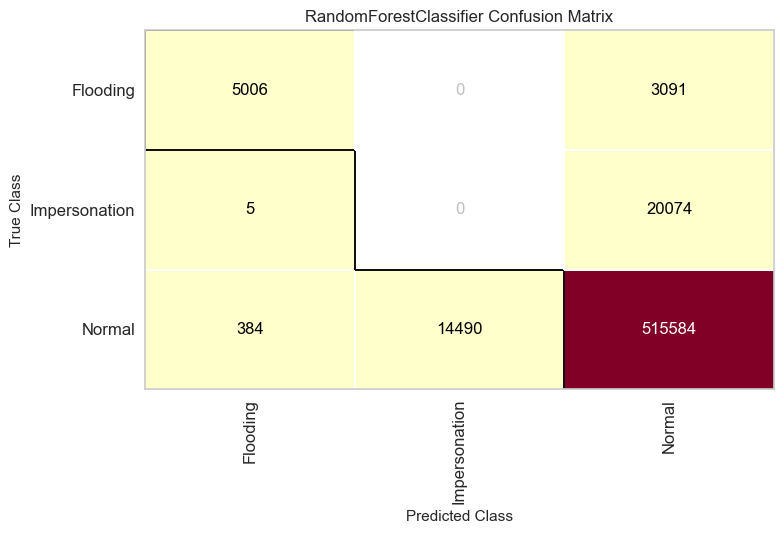

In [32]:
X_train, y_train = X_awid2trn_encoded, y_awid2trn
X_test, y_test = X_awid2tst_encoded, y_awid2tst

y_train = y_train['class'].astype('category').cat.codes
y_test = y_test['class'].astype('category').cat.codes

# Belirli parametreler ile Random Forest
random_forest_model = RandomForestClassifier(
    max_depth=20,
    ccp_alpha=0.001,
    max_leaf_nodes=100,
    min_samples_leaf=2,
    random_state=42
)

random_forest_model.fit(X_train, y_train)

evaluate_classifier(random_forest_model, X_test, y_test)

### Extra Trees

Accuracy: 0.9579
Weighted Precision: 0.9237
Micro Precision: 0.9579
Macro Precision: 0.6385
Weighted Recall: 0.9579
Micro Recall: 0.9579
Macro Recall: 0.5392
Weighted F1 Score: 0.9399
Micro F1 Score: 0.9579
Macro F1 Score: 0.5765
AUC Score: 0.8938


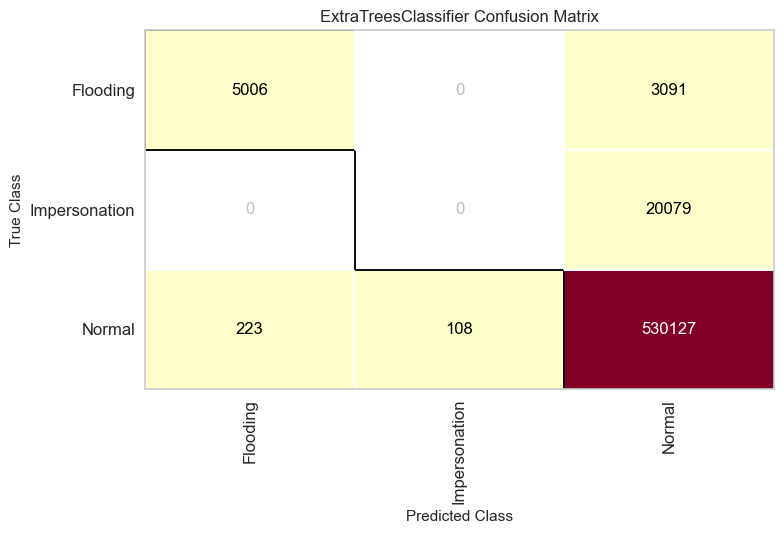

In [33]:
X_train, y_train = X_awid2trn_encoded, y_awid2trn
X_test, y_test = X_awid2tst_encoded, y_awid2tst

y_train = y_train['class'].astype('category').cat.codes
y_test = y_test['class'].astype('category').cat.codes

# Belirli hiperparametreler ile ET model
et_model = ExtraTreesClassifier(
    max_depth=200,
    n_estimators=200,
    ccp_alpha=0.0001,
    max_leaf_nodes=500,
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

et_model.fit(X_train, y_train)

evaluate_classifier(et_model, X_test, y_test)